# Test of Data 

### Importing Packages

In [292]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from nemosis import data_fetch_methods
%matplotlib inline

### Init Data

In [332]:
#initial requirements and properties of the data set
start_date = datetime.datetime(2010, 7, 1)
end_date = datetime.datetime(2011, 6, 30)
state = "NSW1"
start = datetime.datetime(2010, 7, 1, 0, 30)
end = datetime.datetime(2011, 7, 1, 0, 30)
delta = timedelta(minutes=30)


#create a time series for the output data
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

dts = [dt.strftime('%Y/%m/%d 00:00') for dt in 
       datetime_range(start, end, 
       delta)]

halfhourint = pd.DataFrame({"Time":dts})

### Importing and visualising data

In [316]:
#importting data set for use
solar_data = pd.read_csv('2010-2011 Solar home electricity data.csv')
solar_data.head()

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00
0,1,3.78,2076,GC,1-Jul-10,0.303,0.471,0.083,0.121,0.361,...,0.495,0.54,0.406,0.543,0.495,0.216,0.378,0.128,0.078,0.125
1,1,3.78,2076,CL,1-Jul-10,1.250,1.244,1.256,0.744,0.019,...,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.075
2,1,3.78,2076,GG,1-Jul-10,0.000,0.000,0.000,0.000,0.000,...,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,1,3.78,2076,GC,2-Jul-10,0.116,0.346,0.122,0.079,0.120,...,0.262,1.10,1.012,0.817,0.526,0.335,0.402,0.142,0.120,0.111
4,1,3.78,2076,CL,2-Jul-10,1.238,1.238,1.256,1.250,0.169,...,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.088


### Initialising Tariff Data

In [317]:
# Network Component - Units in c/kWh 
hhpd = 48
time = np.linspace(0.5, 24, hhpd)
high_price = 30
low_price = 10
tvec = np.linspace(0.5, 24, hhpd)
tvec1 = np.where((tvec<13) | (tvec>20), low_price, high_price)
#tvec2 = np.where(tvec>20, low_price, high_price)
tvec1

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 10, 10, 10, 10, 10, 10, 10, 10])

### Finding Profile of Customer 1

In [318]:
# making one customer
out = solar_data[(solar_data["Consumption Category"]=="GC")&(solar_data["Customer"]==1)]
pvout = solar_data[(solar_data["Consumption Category"]=="GG")&(solar_data["Customer"]==1)]

### Turning the array into a long boi

In [324]:
# Since the first few columns are not critical, they are removed for analysis
solar_out = out.iloc[:,5:]
index_ = out.iloc[:,4]
solar_out.index = index_ 
new = solar_out.values.flatten().T
new1 = pd.DataFrame({"Gross Consumption (kW)":new})


solarpv_out = pvout.iloc[:,5:]
index_ = pvout.iloc[:,4]
solarpv_out.index = index_ 
new2 = solarpv_out.values.flatten().T
new3 = pd.DataFrame({"Gross Generation (kW)":new2})
new3

,Gross Generation (kW)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
17515,0.0
17516,0.0
17517,0.0
17518,0.0


### Old Heading

In [329]:
halfhourint["Gross Consumption (kW)"] = new1.values
halfhourint["Gross Generation (kW)"] = new3.values
indexing = trading_price['SETTLEMENTDATE']
halfhourint.index = indexing
halfhourint

,Time,Gross Consumption (kW),Gross Generation (kW),Net Generation (kW),Half Hourly Cost (SPOT TARIFF) (?/?)
SETTLEMENTDATE,,,,,
2010-07-01 00:30:00,2010/07/01 00:00,0.303,0.0,0.303,8.89608
2010-07-01 01:00:00,2010/07/01 00:00,0.471,0.0,0.471,13.78146
2010-07-01 01:30:00,2010/07/01 00:00,0.083,0.0,0.083,2.70746
2010-07-01 02:00:00,2010/07/01 00:00,0.121,0.0,0.121,3.85869
2010-07-01 02:30:00,2010/07/01 00:00,0.361,0.0,0.361,10.42568
...,...,...,...,...,...
2011-06-30 22:00:00,2011/06/30 00:00,0.228,0.0,0.228,5.76840
2011-06-30 22:30:00,2011/06/30 00:00,0.458,0.0,0.458,11.69732
2011-06-30 23:00:00,2011/06/30 00:00,0.685,0.0,0.685,17.94700


### Finding Half Hourly Cost

In [326]:
# tarifftype = flatrate
halfhourint['Net Generation (kW)'] = halfhourint["Gross Consumption (kW)"]-halfhourint["Gross Generation (kW)"]
halfhourint['Half Hourly Cost (SPOT TARIFF) (?/?)'] = halfhourint['Net Generation (kW)']*trading_price['RRP']

halfhourint
# Units in c/half hour interval

,Time,Gross Consumption (kW),Gross Generation (kW),Net Generation (kW),Half Hourly Cost (SPOT TARIFF) (?/?)
0,2010/07/01 00:00,0.303,0.0,0.303,8.89608
1,2010/07/01 00:00,0.471,0.0,0.471,13.78146
2,2010/07/01 00:00,0.083,0.0,0.083,2.70746
3,2010/07/01 00:00,0.121,0.0,0.121,3.85869
4,2010/07/01 00:00,0.361,0.0,0.361,10.42568
...,...,...,...,...,...
17515,2011/06/30 00:00,0.228,0.0,0.228,5.76840
17516,2011/06/30 00:00,0.458,0.0,0.458,11.69732
17517,2011/06/30 00:00,0.685,0.0,0.685,17.94700
17518,2011/06/30 00:00,0.650,0.0,0.650,20.07200


### Spot Tariff

In [303]:
table = 'TRADINGPRICE'
raw_data_cache = './cache'

trading_price = data_fetch_methods.dynamic_data_compiler(start.strftime("%Y/%m/%d 00:00:00"),
    end.strftime("%Y/%m/%d 00:00:00"), table, raw_data_cache)

trading_price = trading_price.loc[trading_price['REGIONID'] == state]
trading_price['SETTLEMENTDATE'] = pd.to_datetime(trading_price['SETTLEMENTDATE'], format='%d/%m/%Y %H:%M') 
trading_price = trading_price.sort_values(by=['SETTLEMENTDATE'])
trading_price = trading_price.reset_index(drop=True)    
trading_price['tstep_len'] = [30]*len(trading_price.index)

columns = ['RRP', 'RAISE6SECRRP', 'RAISE60SECRRP', 'RAISE5MINRRP', 'RAISEREGRRP', 'LOWER6SECRRP', 'LOWER60SECRRP', 'LOWERREGRRP']
trading_price[columns] = trading_price[columns].astype(float)



Compiling data for table TRADINGPRICE.
Creating feather file for faster future access of table TRADINGPRICE, year 2010, month 06.
Creating feather file for faster future access of table TRADINGPRICE, year 2010, month 07.
Creating feather file for faster future access of table TRADINGPRICE, year 2010, month 08.
Creating feather file for faster future access of table TRADINGPRICE, year 2010, month 09.
Creating feather file for faster future access of table TRADINGPRICE, year 2010, month 10.
Creating feather file for faster future access of table TRADINGPRICE, year 2010, month 11.
Creating feather file for faster future access of table TRADINGPRICE, year 2010, month 12.
Creating feather file for faster future access of table TRADINGPRICE, year 2011, month 01.
Creating feather file for faster future access of table TRADINGPRICE, year 2011, month 02.
Creating feather file for faster future access of table TRADINGPRICE, year 2011, month 03.
Creating feather file for faster future access of t

In [322]:
trading_price.head()

,SETTLEMENTDATE,REGIONID,RRP,RAISE6SECRRP,RAISE60SECRRP,RAISE5MINRRP,RAISEREGRRP,LOWER6SECRRP,LOWER60SECRRP,LOWER5MINRRP,LOWERREGRRP,PRICE_STATUS,tstep_len
0,2010-07-01 00:30:00,NSW1,29.36,0.60,0.20,0.50,0.50,0.03,0.03,0.4,0.80,FIRM,30
1,2010-07-01 01:00:00,NSW1,29.26,0.66,0.45,0.65,0.65,0.03,0.03,0.43,1.00,FIRM,30
2,2010-07-01 01:30:00,NSW1,32.62,1.16,0.59,0.78,0.78,0.06,0.06,0.51,1.06,FIRM,30
3,2010-07-01 02:00:00,NSW1,31.89,1.12,0.23,0.90,0.90,0.13,0.09,0.53,1.49,FIRM,30
4,2010-07-01 02:30:00,NSW1,28.88,1.38,0.75,0.99,0.99,0.17,0.09,0.67,1.40,FIRM,30


### Plotting Histograms

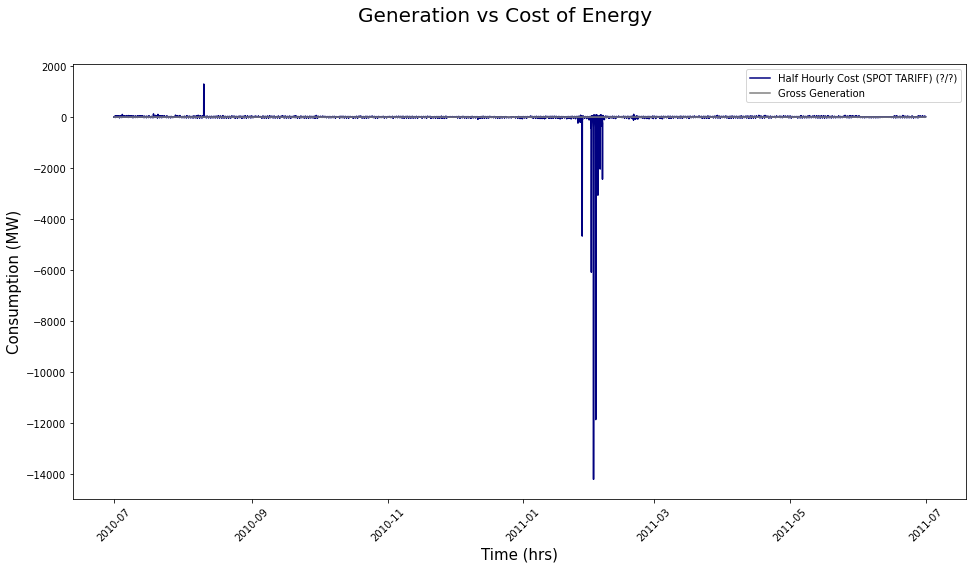

In [331]:
fig = plt.figure(figsize=(16,8))
ax = plt.axes()
plt.plot(halfhourint.index, halfhourint['Half Hourly Cost (SPOT TARIFF) (?/?)'],'#000080',label='Half Hourly Cost (SPOT TARIFF) (?/?)')
plt.plot(halfhourint.index, halfhourint["Gross Consumption (kW)"],'#808080',label='Gross Generation')
plt.xticks(rotation=45)
fig.suptitle('Generation vs Cost of Energy', fontsize=20)
plt.xlabel('Time (hrs)', fontsize=15)
plt.ylabel('Consumption (MW)', fontsize=15)
plt.legend();


### Old Plotting Stuff

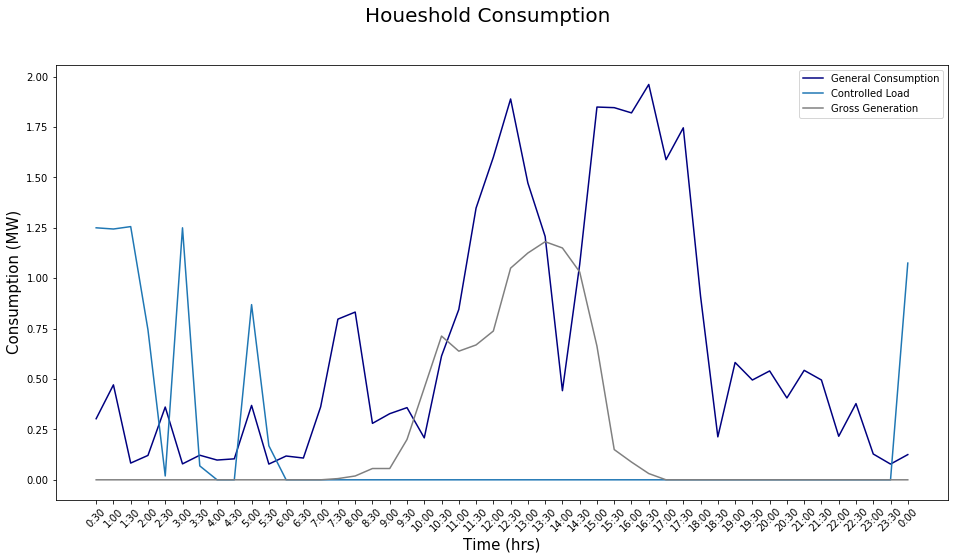

In [44]:
fig = plt.figure(figsize=(16,8))
ax = plt.axes()
plt.plot(pltresults.index, pltresults['GC'],'#000080',label='General Consumption')
plt.plot(pltresults.index, pltresults['CL'],label='Controlled Load')
plt.plot(pltresults.index, pltresults['GG'],'#808080',label='Gross Generation')
plt.xticks(rotation=45)
fig.suptitle('Houeshold Consumption', fontsize=20)
plt.xlabel('Time (hrs)', fontsize=15)
plt.ylabel('Consumption (MW)', fontsize=15)
plt.legend();